In [1]:
# Create intensity function:

# Hard-code the U-shaped pattern
# Start with just 3 periods: morning (high), lunch (low), close (high)
# Test with different lambda values


# First validation:

# Plot hourly trade counts
# Verify the U-shape appears
# Calculate basic statistics (mean, std of inter-arrival times)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, time, timedelta
from numpy.random import default_rng
rng=default_rng()

In [3]:
def get_lambda_for_simulation_time(simulation_minutes_since_open, base_lambda):
    """
    simulation_minutes_since_open: 0 = 9:30 AM, 390 = 4:00 PM
    """
    
    # Convert to hours for easier logic
    hours_since_open = simulation_minutes_since_open / 60
    
    if 0 <= hours_since_open <=1:  # 9:30-10:30 AM
        return base_lambda * 3
    elif 2.5 <= hours_since_open <=3.5:  # 12:00-1:00 PM
        return base_lambda * 0.5
    elif 6 <= hours_since_open <= 6.5:  # 3:30-4:00 PM
        return base_lambda * 2.5
    else:
        return base_lambda

In [4]:
def minutes_to_time_string(minutes_since_open):
    """Convert minutes since market open to HH:MM format"""
    # Market opens at 9:30 AM
    market_open = datetime.strptime("09:30:00", "%H:%M:%S")
    trade_time = market_open + timedelta(minutes=minutes_since_open)
    return trade_time.strftime("%H:%M:%S")

In [5]:
def generate_trades_for_period(period_length , period_start_time , base_lambda):

    current_time=0
    trades=[]

    while current_time<period_length:
        
        """calculating arrival_rate after every interval"""
        current_absolute_time = period_start_time + current_time 
        current_arrival_rate=get_lambda_for_simulation_time(current_absolute_time , base_lambda)
        
        inter_arrival_time=rng.exponential(1/current_arrival_rate)

        current_time+=inter_arrival_time

        if (current_time<period_length):
            absolute_time = period_start_time + current_time
            trades.append(absolute_time)
    
    return trades

    

In [6]:
def generate_trades_by_period():

    total_time=390
    period_length = 60 
    time_points = range(0, 390, period_length)
    all_trades_time=[]

    for start_period in time_points:
        if start_period+period_length>total_time:
            actual_period_length=total_time-start_period
        else:
            actual_period_length=period_length

        base_lambda=2.5  #trades per minute
        period_trades=[]
        period_trades=generate_trades_for_period(actual_period_length , start_period , base_lambda)
        all_trades_time.extend(period_trades)
        print(f"Period {start_period//60 + 1}: {len(period_trades)} trades")

    return sorted(all_trades_time)
     

In [7]:
def calculate_inter_arrival_times(trade_times):

    if len(trade_times) < 2:
        return []

    inter_arrival_times=[]
    for i in range(1,len(trade_times)):
        inter_arrivals=trade_times[i]-trade_times[i-1]
        inter_arrival_times.append(inter_arrivals)

    return inter_arrival_times

In [8]:
def print_trade_times_formatted(trade_times , max_trades=1000):
     """Print trade times in HH:MM:SS format"""
     print(f"\nFirst {min(max_trades, len(trade_times))} trade times:")

     for i, trade_time in enumerate(trade_times[:max_trades]):
        time_str = minutes_to_time_string(trade_time)
        print(f"Trade {i+1}: {time_str}")
    
     if len(trade_times) > max_trades:
        print(f"... and {len(trade_times) - max_trades} more trades")


In [9]:
def print_inter_arrival_analysis(trade_times):
    "Print inter--arrival analysis"
    inter_arrivals = calculate_inter_arrival_times(trade_times)
    

    print(f"\nInter-arrival Time Analysis:")
    print(f"Total trades: {len(trade_times)}")
    print(f"Inter-arrival times: {len(inter_arrivals)}")

    mean_inter_arrival_time= np.mean(inter_arrivals)
    print("MEAN INTER ARRIVAL TIME" , mean_inter_arrival_time , "MINUTES")

    std_inter_arrival_time=np.std(inter_arrivals)
    print("STANDARD DEVIATION INTER ARRIVAL TIME" , std_inter_arrival_time , "MINUTES")

    min_inter_arrival_time=np.min(inter_arrivals)
    print("MIN INTER ARRIVAL TIME" , min_inter_arrival_time , "MINUTES")

    max_inter_arrival_time=np.max(inter_arrivals)
    print("MAX INTER ARRIVAL TIME" , max_inter_arrival_time , "MINUTES")



In [10]:
print("\nGenerating trades for the entire trading day...")
all_trades = generate_trades_by_period()

# Print formatted results
print_trade_times_formatted(all_trades)
print_inter_arrival_analysis(all_trades)


Generating trades for the entire trading day...
Period 1: 433 trades
Period 2: 155 trades
Period 3: 109 trades
Period 4: 116 trades
Period 5: 166 trades
Period 6: 148 trades
Period 7: 191 trades

First 1000 trade times:
Trade 1: 09:30:04
Trade 2: 09:30:14
Trade 3: 09:30:15
Trade 4: 09:30:24
Trade 5: 09:30:36
Trade 6: 09:31:01
Trade 7: 09:31:03
Trade 8: 09:31:25
Trade 9: 09:31:29
Trade 10: 09:31:33
Trade 11: 09:31:38
Trade 12: 09:31:42
Trade 13: 09:31:52
Trade 14: 09:31:57
Trade 15: 09:32:01
Trade 16: 09:32:31
Trade 17: 09:32:31
Trade 18: 09:32:37
Trade 19: 09:32:40
Trade 20: 09:32:50
Trade 21: 09:32:58
Trade 22: 09:33:00
Trade 23: 09:33:11
Trade 24: 09:33:11
Trade 25: 09:33:13
Trade 26: 09:33:25
Trade 27: 09:33:37
Trade 28: 09:33:43
Trade 29: 09:33:51
Trade 30: 09:34:00
Trade 31: 09:34:06
Trade 32: 09:34:21
Trade 33: 09:34:26
Trade 34: 09:34:37
Trade 35: 09:34:39
Trade 36: 09:35:05
Trade 37: 09:35:22
Trade 38: 09:35:40
Trade 39: 09:35:40
Trade 40: 09:35:45
Trade 41: 09:35:53
Trade 42:

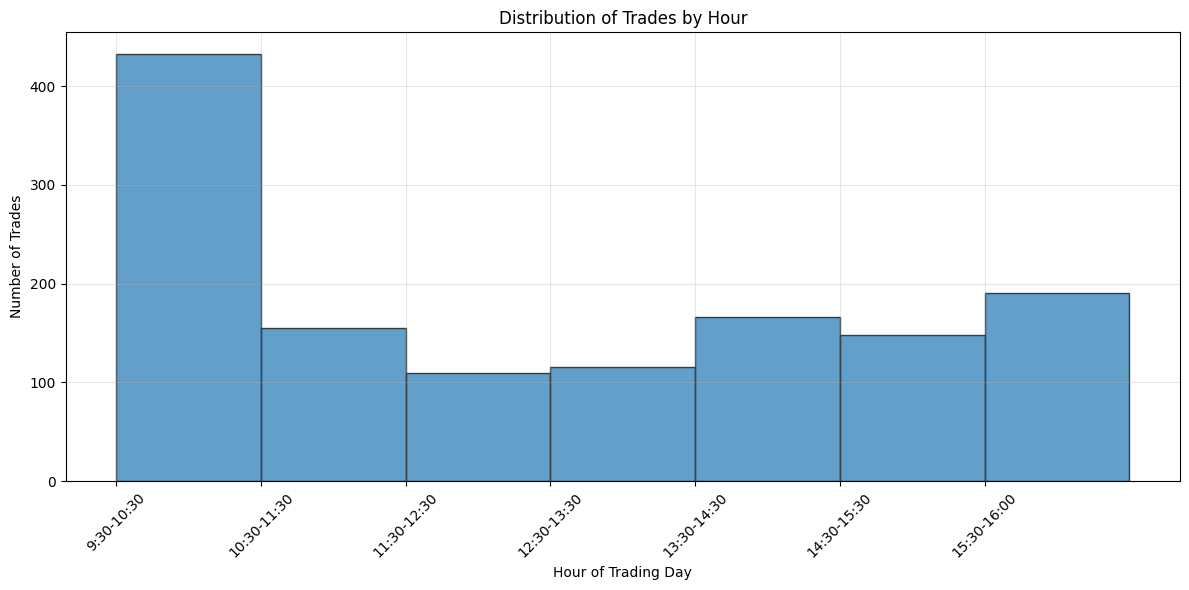


Total trades generated: 1318


In [11]:
plt.figure(figsize=(12, 6))
trade_hours = [int(t // 60) for t in all_trades]
plt.hist(trade_hours, bins=range(8), alpha=0.7, edgecolor='black')
plt.xlabel('Hour of Trading Day')
plt.ylabel('Number of Trades')
plt.title('Distribution of Trades by Hour')
plt.xticks(range(7), ['9:30-10:30', '10:30-11:30', '11:30-12:30', '12:30-13:30', '13:30-14:30', '14:30-15:30', '15:30-16:00'])
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nTotal trades generated: {len(all_trades)}")